# Section 5. Multivariate Linear Regression

### _Objective_
1. 독립 변수가 2개 이상인 Multivariate Linear Regression을 텐서플로우로 구현해 봅니다.
2. Min-Max Scaling에 대해 배워봅니다. <br>


In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import tensorflow as tf

## 문제 1 . 보스턴 집값 예측 모델 구현하기

* boston 집값을 예측하는 예측모형을 Tensorflow 을 이용해서 만들어주세요. 

In [2]:
# 아래 코드를 실행해주세요 
boston = load_boston()
boston_df = pd.DataFrame(boston['data'],
                         columns=boston['feature_names'])
boston_df['house_price'] = boston['target']
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


#### 답안지 입력란
* 아래에 답을 서술하여 주세요


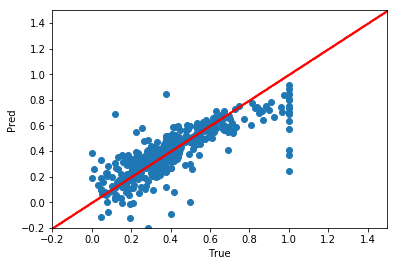

In [3]:
# scaling

x_np = boston['data']
x_np = (x_np - x_np.min(axis=0))/(x_np.max(axis=0) - x_np.min(axis=0))

y_np = boston['target']
y_np = (y_np - y_np.min(axis=0))/(y_np.max(axis=0) - y_np.min(axis=0))
y_np = y_np.reshape((-1, 1))

# variable declaration

num_feature = len(boston['feature_names'])

x = tf.Variable(x_np, dtype=tf.float32)
y = tf.Variable(y_np, dtype=tf.float32)
w = tf.get_variable('weight', (num_feature,1), initializer=tf.initializers.random_normal)

# prediction

y_hat = tf.matmul(x, w)

dw = tf.reduce_mean((y_hat - y)*x, axis=0)
dw = tf.reshape(dw, (-1, 1))

epochs = 300
lr = 5e-1
update_op = tf.assign_sub(w, lr*dw)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

y_hat_ = None
for epoch in range(epochs):
    _, y_hat_ = sess.run([update_op, y_hat])
    
ys = y_np.copy()
ys_pred = y_hat_.copy()
plt.scatter(ys.squeeze(), ys_pred.squeeze())

xs = np.arange(-0.2, 1.6, 0.001)

plt.xlim(-0.2, 1.5)
plt.ylim(-0.2, 1.5)
plt.xlabel('True')
plt.ylabel('Pred')
plt.scatter(xs, xs, marker='.', c='r', s=1)

#### 정답 확인
* 아래 그림이 나오도록 코드를 만들어 주세요.
* X축이 prediction, y축이 True 값이 나오도록 해주세요

![Imgur](https://i.imgur.com/M1KJefy.png)